In [1]:
import sys
import os

# Add the parent directory (project root) to sys.path
sys.path.append(os.path.abspath('..'))

from sandbox_steps.main import DesktopSteps
from e2b_desktop import Sandbox, CommandExitException
E2B_API_KEY = os.environ.get("E2B_API_KEY")

In [4]:
# automatically load changes from the sandbox_steps module
%load_ext autoreload
%autoreload 2

In [5]:
from llm import BaseFunction, OpenAIModel, MemoryManager
import base64

In [11]:
class MoveFunction(BaseFunction):
    """
    Moves the robot in the specified direction for an optional duration.

    This function controls the robot's movement, allowing it to move forward,
    backward, turn left, or right for a specified duration.
    """
    function_schema = {
        "type": "function",
        "function": {
            "name": "move",
            "description": "Move the robot in a specified direction.",
            "parameters": {
                "type": "object",
                "properties": {
                    "command": {
                        "type": "string",
                        "description": "Direction (forward, backward, left, right)."
                    },
                    "duration": {
                        "type": "number",
                        "description": "Duration in seconds for how long the robot should move."
                    }
                },
                "required": ["command", "duration"],
                "additionalProperties": False
            },
            "strict": True
        }
    }

    def __init__(self, desktop: Sandbox):
        self.desktop = desktop

    def execute(self, command: str, duration: float = None):
        print(f"Executing tool call: {command}")
        if command == "forward":
            self.desktop.write("wwwwwwwwwwwwww")
        elif command == "backward":
            self.desktop.write("ssssssssssssss")
        elif command == "left":
            self.desktop.write("aaaaaaaaaaaaaa")
        elif command == "right":
            self.desktop.write("dddddddddddddd")
        return f"Moved {command}"

In [7]:
# With custom configuration
desktop = Sandbox(
    display=":0",  # Custom display (defaults to :0)
    resolution=(1920, 1080),  # Custom resolution
    timeout = 3600) 

desktop.stream.start()

# Get stream URL
url = desktop.stream.get_url()
print(url)

https://6080-i7tiyfvh5iuiirwdp4cdm-4ac9097f.e2b.app/vnc.html?autoconnect=true&resize=scale


In [ ]:
# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

def get_screenshot(desktop: Sandbox):
    image_bytes = desktop.screenshot(format="bytes")

    # Save for debugging
    with open("debug_screenshot.jpg", "wb") as f:
        f.write(image_bytes)

    base64_image = encode_image("debug_screenshot.jpg")

    return base64_image

def get_screenshot_message(desktop: Sandbox):
    base64_image = get_screenshot(desktop)
    return [{
    "role": "user",
    "content": [
        {
            "type": "text",
            "text": f"The current situation on the screen",
        },
        {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}",
            },
        },
    ],
    }]

In [32]:
tools = {
        "move": MoveFunction(desktop)
        }

llm = OpenAIModel(tools=tools)

memory = MemoryManager()
system_message = memory.get_memory_as_messages()

user_message = [
        {
        "role": "user",
        "content": [
                {
                "type": "text",
                "text": "What do you see on the screen?",
                },
                ],
        }
             ]



In [35]:
screenshot_message = get_screenshot_message(desktop)
payload = system_message + user_message + screenshot_message

response, messages = llm.complete(messages=payload)
print(response)

I'm unable to see images. However, if you describe what's on the screen, I can help you with information or answer questions!


[{'role': 'user',
  'content': [{'type': 'text', 'text': 'The current situation on the screen'},
   {'type': 'image_url',
    'image_url': {'url': '',
     'detail': 'low'}}]}]
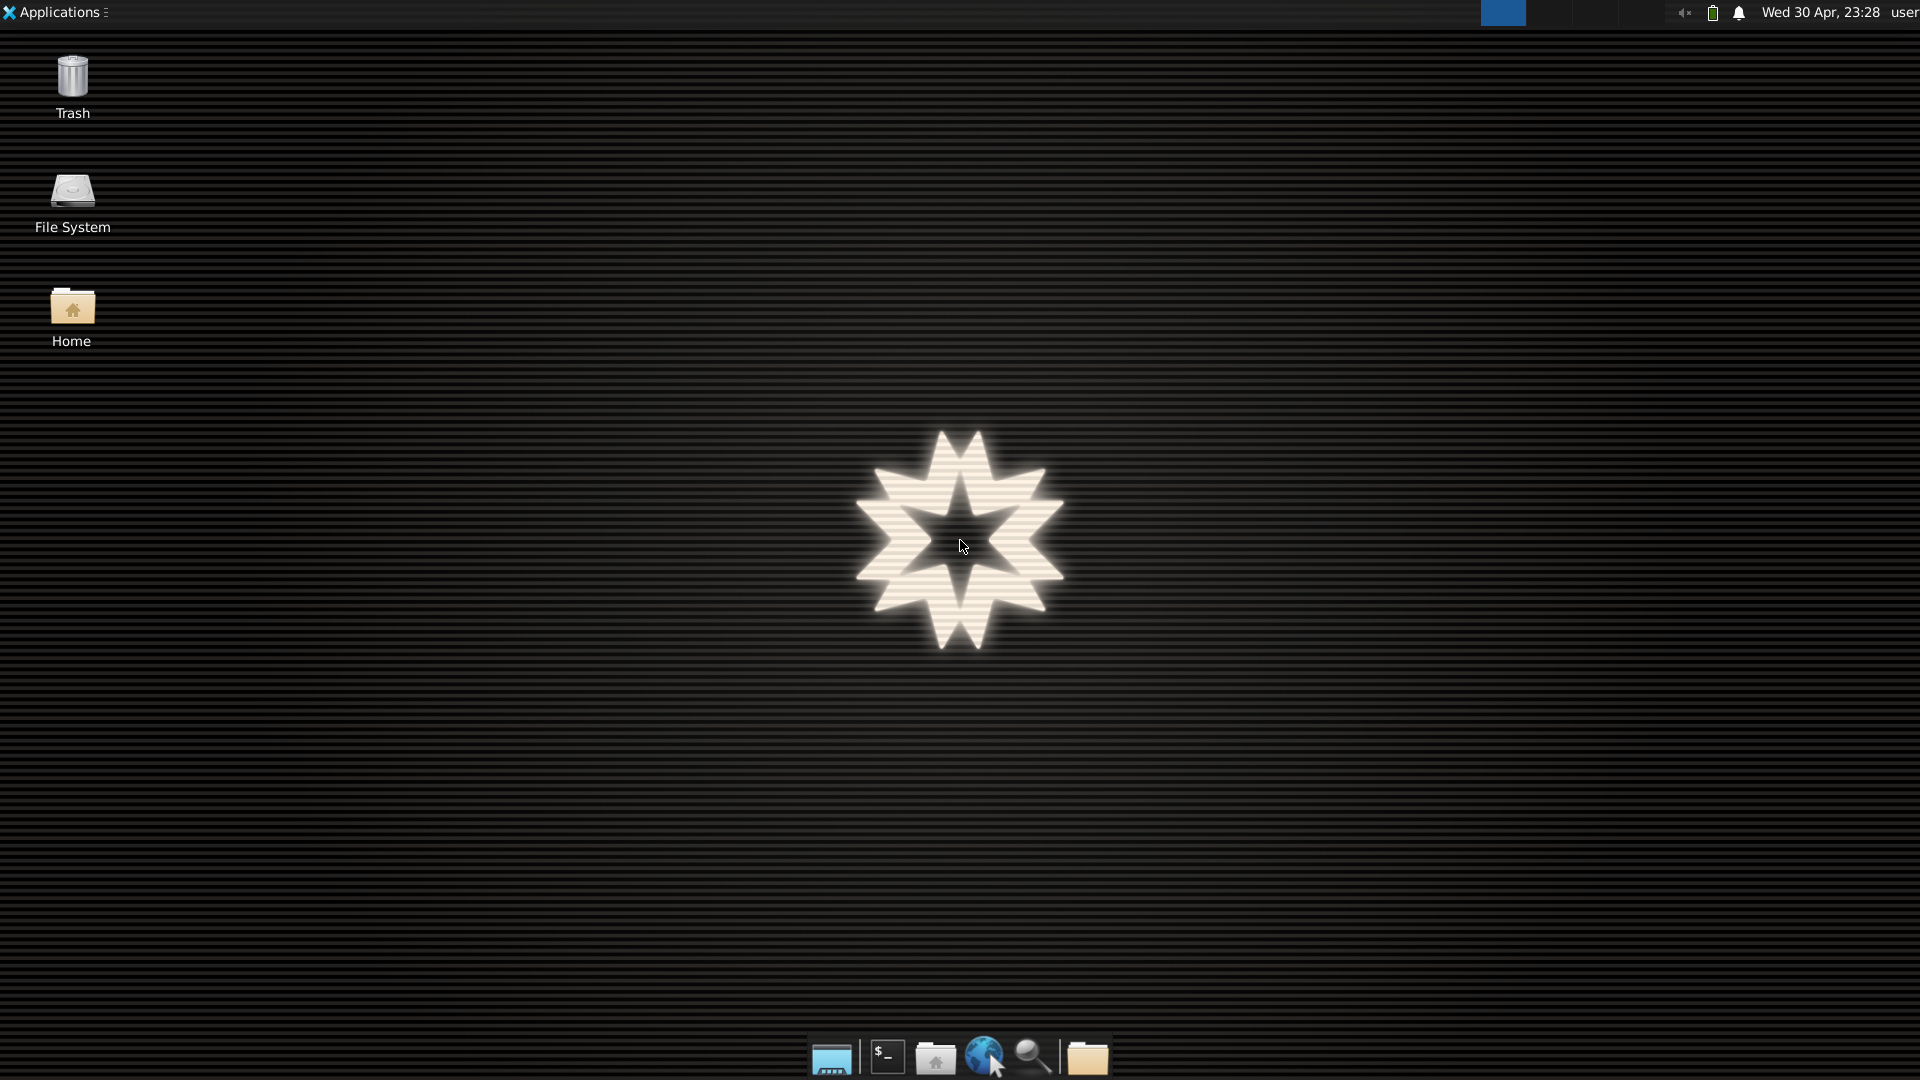

In [19]:
screenshot_message

In [16]:
running_sandboxes = Sandbox.list()
running_sandboxes

[SandboxInfo(sandbox_id='ies3dctuy7o376e5yq5ex-16931f9b', template_id='k0wmnzir0zuzye6dndlw', name='desktop', metadata={}, started_at=datetime.datetime(2025, 4, 30, 23, 14, 16, 578321, tzinfo=tzutc()), end_at=datetime.datetime(2025, 5, 1, 0, 14, 16, 578321, tzinfo=tzutc()))]

In [17]:
Sandbox.kill("ies3dctuy7o376e5yq5ex-16931f9b")

True

In [ ]:
Sandbox.left_click(100, 100) 
Sandbox.right_click(200, 200)

In [ ]:
def install_csgo(desktop: Sandbox):
    desktop.open("https://www.cybersports.lt/setup/")
    desktop.commands.run("sudo dpkg --add-architecture i386")
    desktop.commands.run("sudo apt update")
    desktop.wait(100)
    desktop.commands.run("sudo apt install -y wine32")
    desktop.wait(2000)
    try:
        desktop.commands.run("wine .") # this throws an error for fun
    except CommandExitException:
        pass
    desktop.open("https://drive.google.com/u/0/uc?id=1TIsvGACSrQOr1tgPaVpJebH375LjLIV6&export=download")
    desktop.wait(ms=4000)
    desktop.left_click(460, 305) #click the Download button
    desktop.wait(ms=7000) 
    desktop.commands.run("unzip Downloads/Windows7DefaultFonts.zip -d Downloads") # couldnt find
    desktop.commands.run("mv Downloads/Windows7DefaultFonts/* ~/.wine/drive_c/windows/Fonts/")
    desktop.left_click(880, 1040) # open the terminal (I know, clean)
    desktop.wait(100)
    desktop.left_click(1800, 800) # open the terminal (I know, clean)
    desktop.write("wine Downloads/Counter-Strike-1.6-original.exe", chunk_size=50, delay_in_ms=25) 
    desktop.wait(2000)
    desktop.press("enter") # start the exe with wine
    desktop.wait(6000)
    desktop.press("enter") # start the installation
    desktop.wait(2000)
    desktop.press("enter") # one menu
    desktop.wait(2000)
    desktop.press("enter") # second menu
    desktop.wait(2000)
    desktop.press("enter") # final install button
    desktop.wait(60000) # installation process
    desktop.press("enter") # LAUNCH


In [8]:

desktop.press("enter") # LAUNCH

In [6]:
install_csgo(desktop=desktop)

CommandExitException: Command exited with code 9 and error:
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of Downloads/Windows7DefaultFonts.zip or
        Downloads/Windows7DefaultFonts.zip.zip, and cannot find Downloads/Windows7DefaultFonts.zip.ZIP, period.


In [23]:
desktop.kill()